<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week6/day4/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [3]:

normalized_data = (ninja_data - ninja_data.mean()) / ninja_data.std()


In [4]:
log_scaled_data = np.log(ninja_data + 1)

In [5]:
fft_temperature = np.fft.fft(ninja_data['Temperature'])
fft_pressure = np.fft.fft(ninja_data['Pressure'])
fft_chemical_concentration = np.fft.fft(ninja_data['Chemical Concentration'])


In [6]:
descriptive_stats = ninja_data.describe()

print(descriptive_stats)


              Time  Temperature     Pressure  Chemical Concentration
count  1000.000000  1000.000000  1000.000000             1000.000000
mean     50.000000    19.977372  1013.033617                4.989754
std      28.910854     3.574943    14.203350                1.436505
min       0.000000    13.897407   990.284418                2.559310
25%      25.000000    16.386984   998.852247                3.576024
50%      50.000000    20.008666  1012.950967                4.970976
75%      75.000000    23.570373  1027.062114                6.398067
max     100.000000    26.030294  1035.471676                7.486763


In [7]:
correlation_matrix = ninja_data.corr()

print(correlation_matrix)


                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  
Time                                 -0.156113  
Temperature                          -0.003277  
Pressure                             -0.000863  
Chemical Concentration                1.000000  


In [8]:
from scipy.stats import linregress

result = linregress(ninja_data['Temperature'], ninja_data['Pressure'])
print("Linear Regression Results:")
print(result)


Linear Regression Results:
LinregressResult(slope=0.028257336449499668, intercept=1012.4691096283312, rvalue=0.007112292067251614, pvalue=0.8222655963580492, stderr=0.1257608270216859, intercept_stderr=2.5522409781570294)


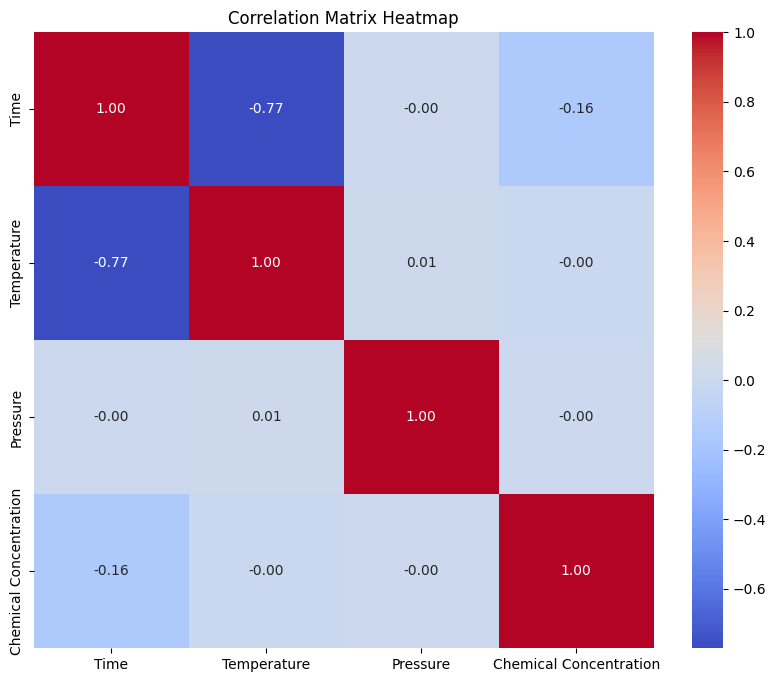

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


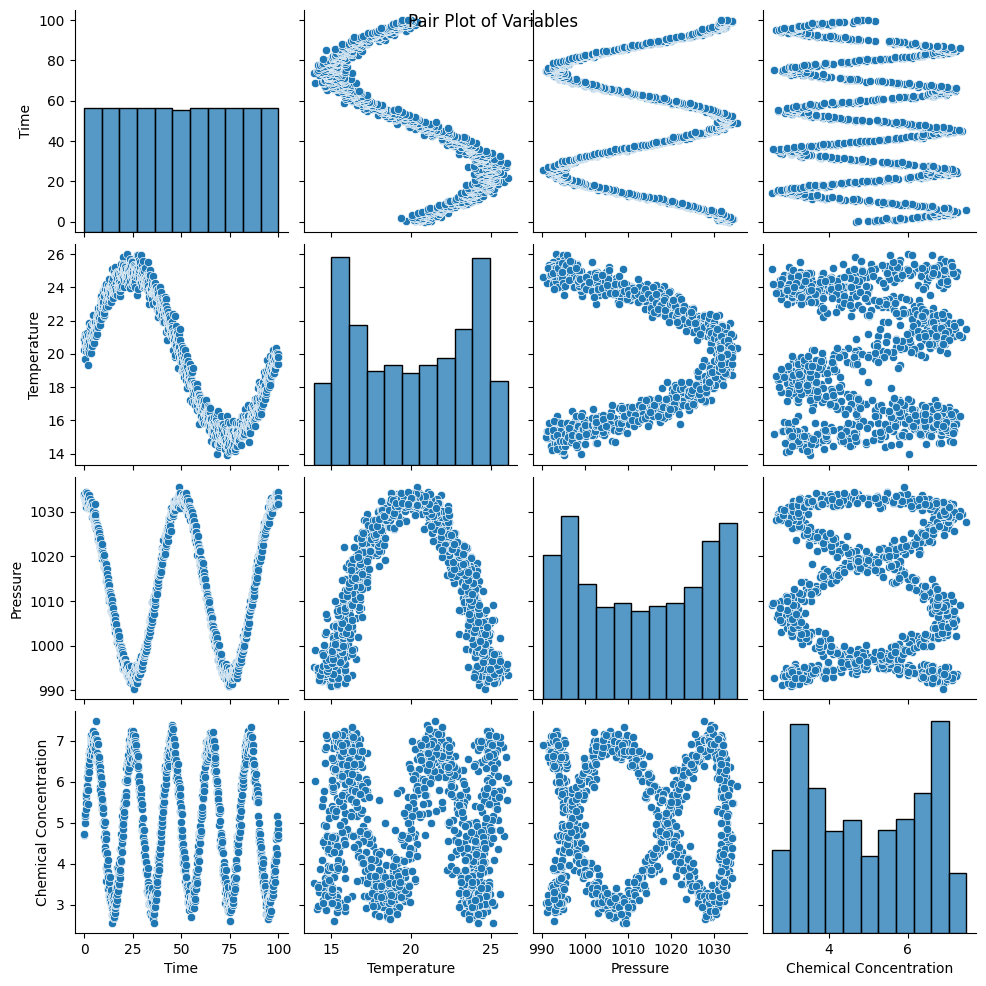

In [10]:
sns.pairplot(ninja_data)
plt.suptitle("Pair Plot of Variables")
plt.show()


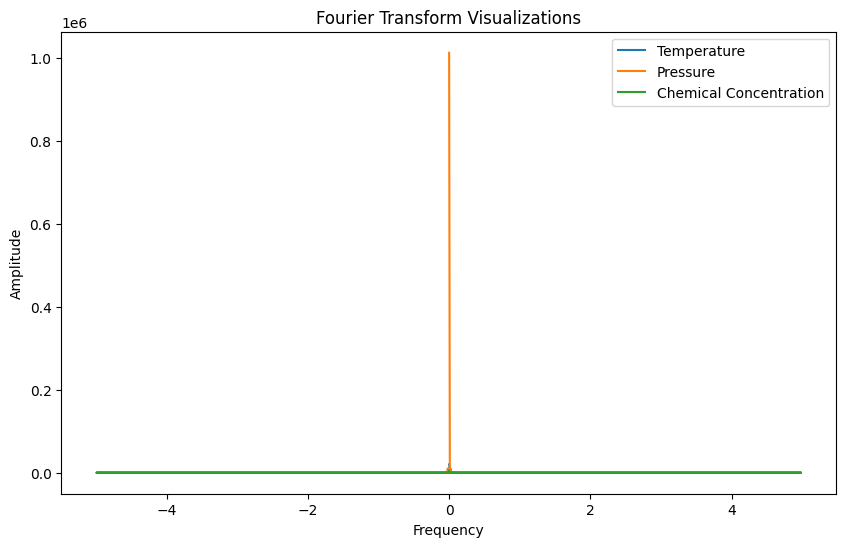

In [11]:
frequency = np.fft.fftfreq(n_entries, d=(time[1]-time[0]))

plt.figure(figsize=(10, 6))
plt.plot(frequency, np.abs(fft_temperature), label='Temperature')
plt.plot(frequency, np.abs(fft_pressure), label='Pressure')
plt.plot(frequency, np.abs(fft_chemical_concentration), label='Chemical Concentration')
plt.title("Fourier Transform Visualizations")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
